In [37]:
#import 相關函式
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, Flatten
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.backend.tensorflow_backend import set_session 
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
#設定CPU使用量
config = tf.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))

In [38]:
#Loss 紀錄函式 提供繪製 acc-loss 圖
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [50]:
# 抓 mnist 資料,資料轉換對應的維度
(x_train, y_train), (x_test_org, y_test_org) = mnist.load_data()

print('shape of train data   [', x_train.shape[0], x_train.shape[1], x_train.shape[2],"]")
print('shape of test  data   [', x_test_org.shape[0], x_test_org.shape[1], x_test_org.shape[2],"]")
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test_org.reshape(10000,28,28,1).astype('float32')  
x_train /= 255
x_test /= 255
print('reshape of train data [', x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3],"]")
print('reshape of test  data [', x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3], "]")
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test_org)
print()
print("To Categorical [", y_test_org[0], "] => ", y_test[0])

history = LossHistory()

shape of train data   [ 60000 28 28 ]
shape of test  data   [ 10000 28 28 ]
reshape of train data [ 60000 28 28 1 ]
reshape of test  data [ 10000 28 28 1 ]

To Categorical [ 7 ] =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [51]:
# CNN模型建置
model = Sequential()
model.add(Conv2D(5, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

"""
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))  
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(10, activation='softmax'))  
model.summary()  
"""
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 5)         130       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 720)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 196)               141316    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1970      
Total params: 143,416
Trainable params: 143,416
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 開始訓練
train_history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2885 - acc: 0.9129 - val_loss: 0.1386 - val_acc: 0.9569
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0988 - acc: 0.9699 - val_loss: 0.0733 - val_acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0631 - acc: 0.9810 - val_loss: 0.0575 - val_acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0467 - acc: 0.9857 - val_loss: 0.0553 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0359 - acc: 0.9893 - val_loss: 0.0474 - val_acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0292 - acc: 0.9908 - val_loss: 0.0443 - val_acc: 0.9852
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0245 - acc: 0.9926 - val_loss: 0.0455 - val_ac

10000/10000 [==============================] - 1s 65us/step
[Info] Accuracy of testing data = 96.1%

Test score: 0.04520959296999608
Test accuracy: 0.9871


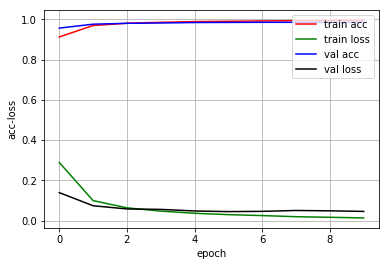

In [53]:
# 模型评估
score = model.evaluate(x_test, y_test, verbose=1)
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

# 繪製 acc-loss 曲线
history.loss_plot('epoch')

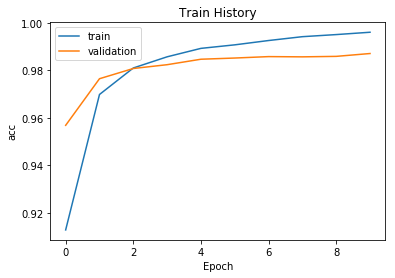

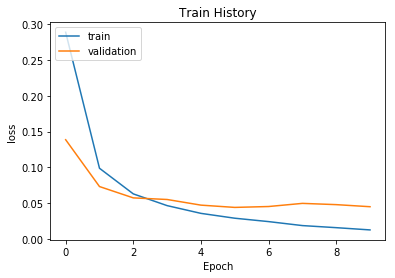

In [54]:
# 個別繪製 acc and loss 曲线
from utils import *  
if isDisplayAvl():  
    show_train_history(train_history, 'acc', 'val_acc')  
    show_train_history(train_history, 'loss', 'val_loss')  

[5 9 8 7 2 3 0 2 4 2]



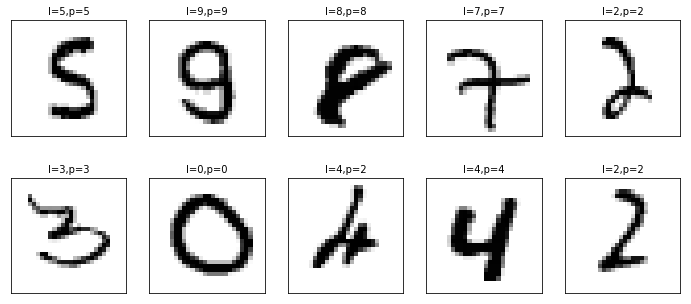

[Info] Display Confusion Matrix:
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        972     0     0    0    0    1    3     1    3    0
1          0  1130     1    0    0    1    1     0    2    0
2          1     2  1022    0    2    0    1     2    2    0
3          0     0     3  999    0    5    0     2    1    0
4          0     1     2    0  974    0    0     0    0    5
5          2     0     0    5    0  884    1     0    0    0
6          2     3     1    0    3    3  945     0    1    0
7          1     5    10    1    0    0    0  1007    2    2
8          4     0     3    2    0    2    2     2  958    1
9          0     2     0    4   10    4    0     6    3  980



In [55]:
# 模型评估 數據比對
prediction = model.predict_classes(x_test)  # Making prediction and save result to prediction  
print("%s\n" % (prediction[240:250]))  
if isDisplayAvl():  
    plot_images_labels_predict(x_test_org, y_test_org, prediction, idx=240) 
    
# 模型评估 數據分布統計  
import pandas as pd  
print("[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test_org, prediction, rownames=['label'], colnames=['predict']))  